In [65]:
import os
import shutil

from _helpers import prepareData, make_directory

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [66]:
def get_dataframe_by_plate(input_path, plate):
    path = os.path.join(input_path, plate, 'extracted.csv')
    return prepareData(path)

In [11]:
def get_most_common(df, n_common=1, class_name='Cl'):
    return df[df[class_name].isin(df[class_name].value_counts()[:n_common].index)]

In [12]:
# Combined: Cl, Subtypes: 'Sp type'

num_classes = 10
csv_name = 'Subtypes'  # Combined
setting = '21_2'
class_name = 'Sp type'  # Cl
data_root = '/home/stepan/Data/DFBS'
output_dir = f'/home/stepan/Data/Datasets/DFBS_{setting}'
input_path = f'{data_root}/Plates/{csv_name}/{setting}'
images_path = f'{data_root}/Plate_images/{csv_name}/{setting}'

In [13]:
plates = os.listdir(input_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/stepan/Data/DFBS/Plates/Subtypes/21_2'

In [94]:
data_list = list(map(get_dataframe_by_plate, plates))

In [95]:
data = pd.concat(data_list)
data.shape

(3580, 14)

In [96]:
data.head()

,Glon,Glat,_RAJ2000,_DEJ2000,Cl,Name,V,Spectral Type,Sp type,Mag type,dx,dy,plate,path
Unnamed: 0,,,,,,,,,,,,,,
1691,138.854571,32.693676,128.678708,75.138722,Mrk,15,14.43,e,Mrk SB,14.0,2598.0,7630.0,fbs0815M_cor,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
2146,140.517689,32.190236,125.427792,73.925067,sd,GALEXJ08217+7355,14.45,sdOB,sdB,14.0,4378.0,4645.0,fbs0815M_cor,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
875,230.882822,19.528236,128.478750,-6.090278,C,0833-0605,13.00,N(Ste),C-N,13.0,3326.0,2407.0,fbs1512_cor,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
2092,229.472439,20.618174,128.719910,-4.391730,sd,SDSSJ083452.77-042330.2,14.25,sdB,sdB,14.0,2901.0,6390.0,fbs1512_cor,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
351,224.383108,26.236246,131.224226,2.469596,C,J084453.81+022810.5,13.44,C-H,C-H,13.0,5522.0,3706.0,fbs1507_cor,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...


In [97]:
# data.loc[128]['path']
data.loc[1223]['path']

Unnamed: 0
1223    /home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
1223    /home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
1223    /home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
Name: path, dtype: object

In [98]:
data[class_name].value_counts()

sdB        973
Mrk SB     797
C-H        743
C Ba       257
sdO        219
sdA        193
Mrk AGN    149
Mrk Abs    134
C-R         64
C-N         51
Name: Sp type, dtype: int64

In [99]:
df = get_most_common(data, n_common=num_classes, class_name=class_name)

df = df[[class_name, 'path']]

df_train = pd.DataFrame(columns=df.columns)
df_test = pd.DataFrame(columns=df.columns)

for c in df[class_name].unique():
    c_indices = df[df[class_name] == c].index.unique()
    train_ind, test_ind = train_test_split(c_indices, test_size=0.15, shuffle=True)
    print(f'{c}:', c_indices.shape[0], f'Train: {train_ind.shape[0]}', f'Test: {test_ind.shape[0]}')
    df_train = pd.concat([df_train, df.loc[train_ind]])
    df_test = pd.concat([df_test, df.loc[test_ind]])

Mrk SB: 446 Train: 379 Test: 67
sdB: 593 Train: 504 Test: 89
C-N: 34 Train: 28 Test: 6
C-H: 458 Train: 389 Test: 69
Mrk Abs: 71 Train: 60 Test: 11
sdA: 124 Train: 105 Test: 19
sdO: 131 Train: 111 Test: 20
C Ba: 156 Train: 132 Test: 24
C-R: 41 Train: 34 Test: 7
Mrk AGN: 80 Train: 68 Test: 12


In [100]:
df_train[class_name].value_counts()

sdB        835
Mrk SB     685
C-H        635
C Ba       224
sdO        183
sdA        165
Mrk AGN    127
Mrk Abs    116
C-R         54
C-N         42
Name: Sp type, dtype: int64

In [101]:
df_test[class_name].value_counts()

sdB        138
Mrk SB     112
C-H        108
sdO         36
C Ba        33
sdA         28
Mrk AGN     22
Mrk Abs     18
C-R         10
C-N          9
Name: Sp type, dtype: int64

In [102]:
# train_indices, test_indices = train_test_split(data.index.unique(), test_size=0.15, shuffle=True)

In [103]:
# df_train, df_test = data.loc[train_indices][[class_name, 'path']], data.loc[test_indices][[class_name, 'path']]

In [104]:
df_train.head()

,Sp type,path
1618,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
1191,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
1253,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
1371,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...
1371,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...


In [105]:
df_train['fname'] = df_train['path'].str.split('/', expand=True, ).iloc[:,-1]
df_train.rename(columns={class_name: "Cl"}, inplace=True)
df_test['fname'] = df_test['path'].str.split('/', expand=True, ).iloc[:,-1]
df_test.rename(columns={class_name: "Cl"}, inplace=True)

In [106]:
df_train.head()

,Cl,path,fname
1618,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...,1618__375.tiff
1191,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...,1191__764.tiff
1253,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...,1253__758.tiff
1371,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...,1371__426.tiff
1371,Mrk SB,/home/stepan/Data/DFBS/Plates/Subtypes/21_2/fb...,1371__426.tiff


## Movements

In [107]:
domains = ['train', 'test']
for domain in domains:
    domain_dir = os.path.join(output_dir, domain)
    make_directory(domain_dir)
    for sp_type in df[class_name].value_counts().keys():
        os.mkdir(f'{domain_dir}/{sp_type}')

In [108]:
for i, value in df_train.reset_index().iterrows():
    shutil.copyfile(value['path'], f'{output_dir}/train/{value["Cl"]}/{i}_{value["fname"]}')
for i, value in df_test.reset_index().iterrows():
    shutil.copyfile(value['path'], f'{output_dir}/test/{value["Cl"]}/{i}_{value["fname"]}')

In [109]:
print('Movements complete! You can train now')

Movements complete! You can train now


In [63]:
import os
import shutil

from _helpers import prepareData, make_directory

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def get_dataframe_by_plate(plate):
    path = os.path.join(input_path, plate, 'extracted.csv')
    return prepareData(path)

def get_most_common(df, n_common=1, class_name='Cl'):
    return df[df[class_name].isin(df[class_name].value_counts()[:n_common].index)]

# Combined: Cl, Subtypes: 'Sp type'

num_classes = 10
csv_name = 'Subtypes'  # Combined
setting = '21_2'
class_name = 'Cl'  # Cl
data_root = '/home/stepan/Data/DFBS'
input_path = f'{data_root}/Plates/{csv_name}/{setting}'
images_path = f'{data_root}/Plate_images/{csv_name}/{setting}'


output_dir = f'/home/sargis/Datasets/Stepan/DFBS_Combine'

In [51]:
# df = pd.DataFrame(columns=['Cl', 'path', 'fname'])
# df

In [52]:
root_all = '../DFBS_Combine/All'
classes = os.listdir(root_all)

In [53]:
# for c in classes:
#     root_c = os.path.join(root_all, c)
#     for fname in os.listdir(root_c):
#         df = df.append(pd.Series([c, fname, os.path.join(root_c, fname)], index=['Cl', 'fname', 'path']), ignore_index=True)

In [54]:
df.head()

,Cl,path,fname
0,Mrk AGN,../DFBS_Combine/All/Mrk AGN/3040_1118__504.tiff,3040_1118__504.tiff
1,Mrk AGN,../DFBS_Combine/All/Mrk AGN/2733_1075__789.tiff,2733_1075__789.tiff
2,Mrk AGN,../DFBS_Combine/All/Mrk AGN/507_1161__64.tiff,507_1161__64.tiff
3,Mrk AGN,../DFBS_Combine/All/Mrk AGN/2713_1160__783.tiff,2713_1160__783.tiff
4,Mrk AGN,../DFBS_Combine/All/Mrk AGN/2881_1139__699.tiff,2881_1139__699.tiff


In [58]:
# df1 = df.copy()

In [59]:
df = get_most_common(df, n_common=num_classes, class_name=class_name)

df = df[[class_name, 'fname', 'path']]

df_train = pd.DataFrame(columns=df.columns)
df_test = pd.DataFrame(columns=df.columns)

for c in df[class_name].unique():
    c_indices = df[df[class_name] == c].index.unique()
    train_ind, test_ind = train_test_split(c_indices, test_size=0.15, shuffle=True)
    print(f'{c}:', c_indices.shape[0], f'Train: {train_ind.shape[0]}', f'Test: {test_ind.shape[0]}')
    df_train = pd.concat([df_train, df.loc[train_ind]])
    df_test = pd.concat([df_test, df.loc[test_ind]])


Mrk AGN: 658 Train: 559 Test: 99
sdA: 889 Train: 755 Test: 134
Mrk Abs: 586 Train: 498 Test: 88
Mrk SB: 3469 Train: 2948 Test: 521
C-N: 241 Train: 204 Test: 37
C-R: 313 Train: 266 Test: 47
sdO: 993 Train: 844 Test: 149
sdB: 4567 Train: 3881 Test: 686
C-H: 3553 Train: 3020 Test: 533
C Ba: 1274 Train: 1082 Test: 192


In [61]:
df_train.head()

,Cl,fname,path
287,Mrk AGN,2516_1129__507.tiff,../DFBS_Combine/All/Mrk AGN/2516_1129__507.tiff
537,Mrk AGN,2784_1132__728.tiff,../DFBS_Combine/All/Mrk AGN/2784_1132__728.tiff
350,Mrk AGN,2788_1130__1370.tiff,../DFBS_Combine/All/Mrk AGN/2788_1130__1370.tiff
150,Mrk AGN,2783_1162__864.tiff,../DFBS_Combine/All/Mrk AGN/2783_1162__864.tiff
73,Mrk AGN,2952_1120__1158.tiff,../DFBS_Combine/All/Mrk AGN/2952_1120__1158.tiff


In [64]:
domains = ['train', 'test']
for domain in domains:
    domain_dir = os.path.join(output_dir, domain)
    make_directory(domain_dir)
    for sp_type in df[class_name].value_counts().keys():
        os.mkdir(f'{domain_dir}/{sp_type}')

for i, value in df_train.reset_index().iterrows():
    shutil.copyfile(value['path'], f'{output_dir}/train/{value["Cl"]}/{i}_{value["fname"]}')
for i, value in df_test.reset_index().iterrows():
    shutil.copyfile(value['path'], f'{output_dir}/test/{value["Cl"]}/{i}_{value["fname"]}')
    
print('Movements complete! You can train now')

Movements complete! You can train now


In [251]:
dd = pd.read_csv('/home/stepan/Data/DFBS/Datasets/Subtypes.csv')
dd.head()

,Unnamed: 0,Glon,Glat,_RAJ2000,_DEJ2000,Cl,Name,V,Spectral Type,Sp type,Mag type
0,2,122.144176,-16.278393,11.759187,46.586624,C,J004702.20+463511.8,12.50,Ba,C Ba,NaN
1,3,56.802895,44.775401,245.485024,35.227892,C,J162156.40+351340.4,12.53,Ba,C Ba,NaN
2,4,139.573743,-17.214979,34.753234,42.809063,C,J021900.77+424832.6,12.54,Ba,C Ba,NaN
3,5,202.700055,-15.477888,84.455417,1.757550,C,J053749.30+014527.1,12.54,Ba,C Ba,NaN
4,6,171.458552,-17.195888,65.240196,25.357196,C,J042057.64+252125.9,12.55,Ba,C Ba,NaN


In [265]:
inp_dir = os.path.join(output_dir, 'train')

cls = os.listdir(inp_dir)
for cl in cls:
    cls_dir = os.path.join(inp_dir, cl)
    imgs = os.listdir(cls_dir)
    pd_i = imgs[-1].split('__')[0].split('_')[-1]
    print(imgs[-1])
    print(cl)
    print(dd.iloc[int(pd_i)][['Sp type', 'Name']], pd_i)
    print()

2772_951__J163423.60+165850.5.tiff
C-R
Sp type                    C-R
Name       J163423.60+165850.5
Name: 951, dtype: object 951

2263_1868__PG0258+184.tiff
sdA
Sp type           sdA
Name       PG0258+184
Name: 1868, dtype: object 1868

804_2341__TON299.tiff
sdB
Sp type       sdB
Name       TON299
Name: 2341, dtype: object 2341

2896_1154__867.tiff
Mrk AGN
Sp type    Mrk AGN
Name           867
Name: 1154, dtype: object 1154

1549_745__J145334.52+340228.8.tiff
C-H
Sp type                    C-H
Name       J145334.52+340228.8
Name: 745, dtype: object 745

2571_198__J174127.72+211202.6.tiff
C Ba
Sp type                   C Ba
Name       J174127.72+211202.6
Name: 198, dtype: object 198

1467_872__J071057.46+475818.1.tiff
C-N
Sp type                    C-N
Name       J071057.46+475818.1
Name: 872, dtype: object 872

2119_1066__1215.tiff
Mrk Abs
Sp type    Mrk Abs
Name          1215
Name: 1066, dtype: object 1066

2400_2972__PG1511+447.tiff
sdO
Sp type           sdO
Name       PG1511+447
Na

In [225]:
for plate in os.listdir(input_path):
    plate_dir = os.path.join(input_path, plate,)
    print(os.listdir(plate_dir))
    break

['2146__GALEXJ08217+7355.tiff', '1691__15.tiff']


## Data loading

In [81]:
import random

import numpy as np
import torch
from PIL import Image

from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
import torchvision.transforms.functional as TF


def load_image(path):
    im = Image.open(path)
    im = np.array(im)
    im = (im - im.min())/(im.max() - im.min())
    if im.mean() > 0.5:
        im = 1 - im
    return im


class ZFill:
    def __init__(self, max_height=160, max_width=50):
        self.max_height = max_height
        self.max_width = max_width

    def __call__(self, image):
        s = image.shape

        d_width = (self.max_width - s[2])
        d_height = (self.max_height - s[1])

        d_left = int(d_width / 2)
        d_top = int(d_height / 2)
        d_right = int(d_width - d_left)
        d_bottom = int(d_height - d_top)

        image = TF.pad(img=image, padding=[d_left, d_top, d_right, d_bottom], fill=0)
        return image


class HeightShift:
    def __init__(self, fraction=0.15):
        assert 0 <= fraction <= 1
        self.fraction = fraction

    def __call__(self, image):
        width = image.shape[-1]
        height = image.shape[-2]

        direction = random.choice([-1, 1])
        height_fraction = int(self.fraction * height) + 1
        shift_size = random.choice(list(range(height_fraction)))

        if direction > 0:
            img = TF.crop(img=image, left=0, width=width, top=shift_size, height=height-shift_size)
        else:
            img = TF.crop(img=image, left=0, width=width, top=0, height=height-shift_size)

        return img


class WidthShift:
    def __init__(self, fraction=0.15):
        assert 0 <= fraction <= 1
        self.fraction = fraction

    def __call__(self, image):
        width = image.shape[-1]
        height = image.shape[-2]

        direction = random.choice([-1, 1])
        width_fraction = int(self.fraction * width) + 1
        shift_size = random.choice(list(range(width_fraction)))

        if direction > 0:
            img = TF.crop(img=image, left=0, width=width-shift_size, top=0, height=height)
        else:
            img = TF.crop(img=image, left=shift_size, width=width-shift_size, top=0, height=height)

        return img


def load_images(path, batch_size, domain):
    if domain == 'train':
        transform = T.Compose([
            T.ToTensor(),
            T.ConvertImageDtype(torch.float32),
#             T.RandomRotation(degrees=2),
            T.RandomHorizontalFlip(),
            T.ColorJitter(brightness=0.2, contrast=0.5),
            WidthShift(fraction=0.2),
            HeightShift(fraction=0.2),
            T.Resize(size=(140, 20)),
            ZFill(max_height=160, max_width=50),
        ])
    else:
        transform = T.Compose([
            T.ToTensor(),
            T.ConvertImageDtype(torch.float32),
            T.Resize(size=(140, 20)),
            ZFill(max_height=160, max_width=50),
        ])

    dataset = ImageFolder(path, transform=transform, loader=load_image)
    data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

    print(f'Loading {len(dataset)} images from {path} is over.')

    return data_loader, dataset.class_to_idx

In [82]:
train = load_images('/home/stepan/Data/Datasets/DFBS_13_2/train', 20, 'train')

Loading 2723 images from /home/stepan/Data/Datasets/DFBS_13_2/train is over.


In [60]:
for a in enumerate(train):
    imgs = a
    break

In [61]:
batch_idx, data = imgs

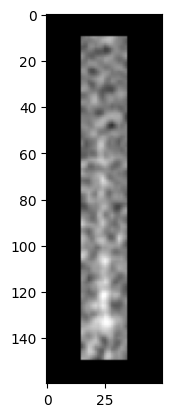

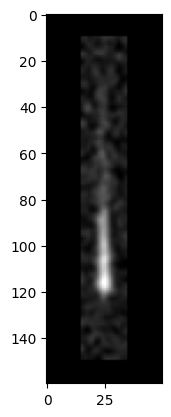

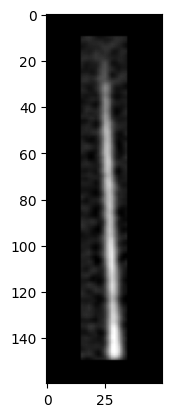

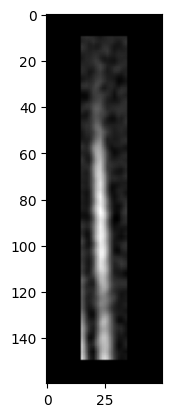

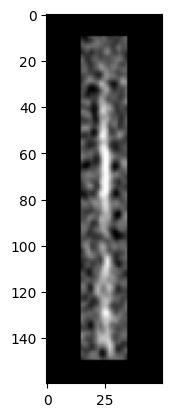

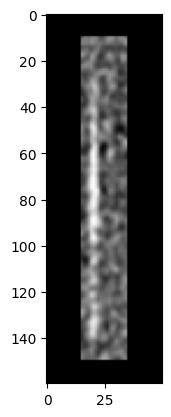

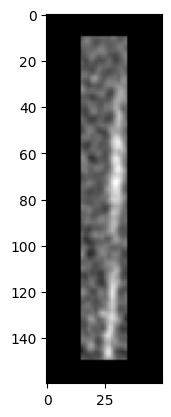

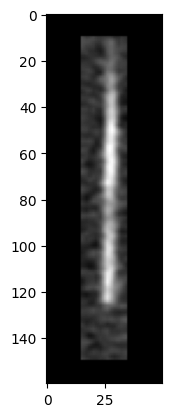

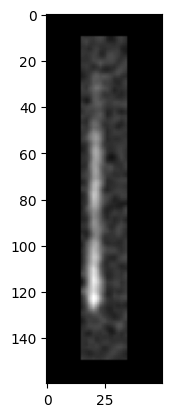

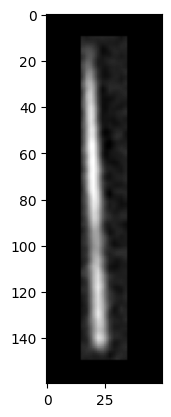

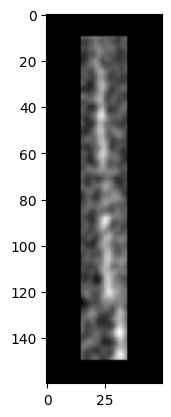

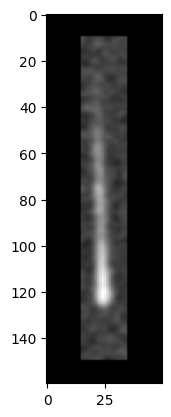

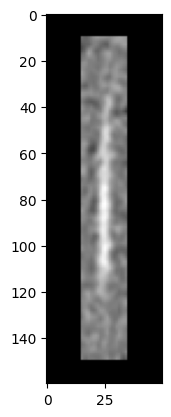

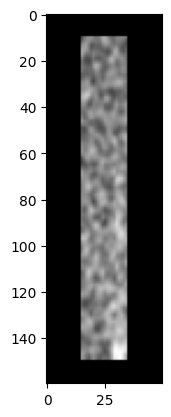

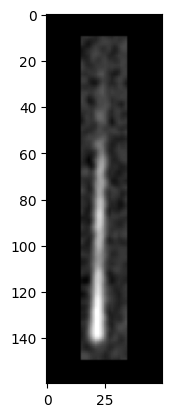

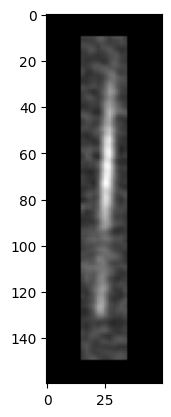

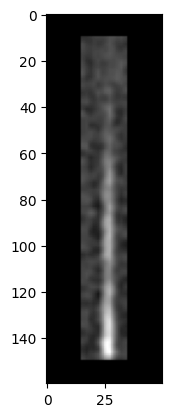

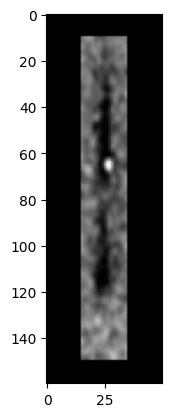

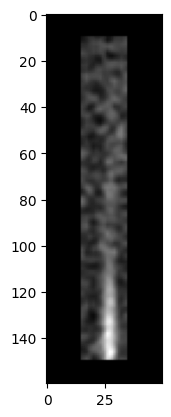

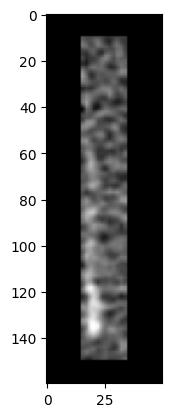

In [62]:
for img in data[0]:
    import matplotlib.pyplot as plt
    plt.gray()
    plt.imshow(img.permute(1, 2, 0))
    plt.show()